<a href="https://colab.research.google.com/github/NikKon01/Univercity/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error = 1810.0329670887102
Error = 1094.896945944844
Error = 688.0234484525689
Error = 549.8805577651437
Error = 527.6374622823466
Error = 518.8020551871286
Error = 513.6269386130242
Error = 508.66859081914583
Error = 504.37828030412084
Error = 500.5731340835339
Error = 496.34723671090563
Error = 492.0643001281062
Error = 487.7912184834607
Error = 483.1589403827745
Error = 478.3136179252053


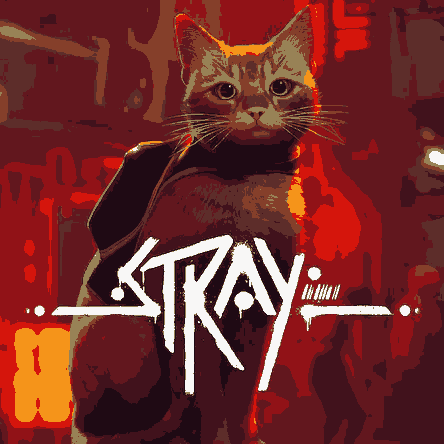

In [2]:
import numpy as np
import matplotlib
from PIL import Image

def kmeans(Input,K,Max_iters):

  N,D = np.shape(Input)
  R = np.random.permutation(N)
  Kvec = Input[R[0:K],:]
  Distance = np.zeros((N,K))

  for nn in range(0,Max_iters):
    F = np.zeros((N,K))
    for kk in range(0,K):
      Distance[:,kk] = np.sum( np.square(Input - np.tile( Kvec[kk,:],
(N,1)),dtype=np.float64),axis=1 )
    Dmin = Distance.argmin(axis=1) % Distance.shape[1]
    for mm in range(0,K):
      if np.size(Dmin[mm==Dmin]) >0:
        Kvec[mm,:] = np.mean(Input[mm==Dmin],axis=0)
    for ii in range(0,N):
      F[ii,Dmin[ii]] = 1
    error = sum(sum((F*Distance)/N))
    print('Error = ' + str(error))
  return Kvec,Dmin

Datain = np.asarray(Image.open('17.jpg'),dtype=np.float64)
ReshapedData = np.reshape(Datain, (np.size(Datain,0) *
np.size(Datain,1),np.size(Datain,2)))
K = 10
Max_iters = 15
Kvec,Dmin = kmeans(ReshapedData,K,Max_iters)
Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))
for jj in range(0,K):
 Dvec[jj==Dmin,:] = Kvec[jj,:]
imout = np.reshape(np.uint8(Dvec),
(np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))
im = Image.fromarray(imout,'RGB')
im.show()
im.save('output.jpeg', "JPEG", optimize = True)